# NLP 강사님 자료
>한국어 말뭉치
KoNLPy에서는  대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공한다. 

>각 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있고 open 메서드로 해당 파일의 텍스트를 읽어들인다.

In [11]:
import nltk
import matplotlib.pyplot as plt

from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()



# doc_ko
# \n을 포함한 모든 내용을 출력한다.

In [19]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [6]:
# 이번에는 트위터 분석기로 명사 분석
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
# tokens_ko
# 명사들만 가져온다.

C:\Users\Hansol\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [9]:
# 수집된 단어의 횟수와 고유 횟수를 확인해보자
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

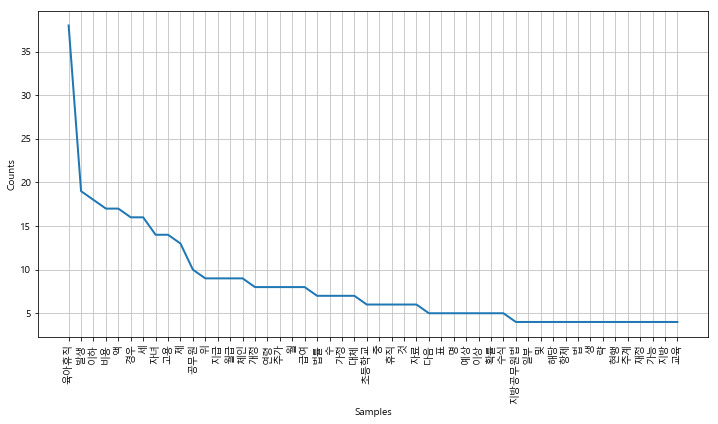

In [20]:
# 많이 등장하는 순서로 plot 해 보면 당연히 육아휴직이라는 단어가 많이 등장한다
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

# 위 결과 약간 의미없는 단어도 보입니다.

In [21]:
# stop-words를 지정하고
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
# ko
# 불용어 처리. 의미있는 단어만 추출

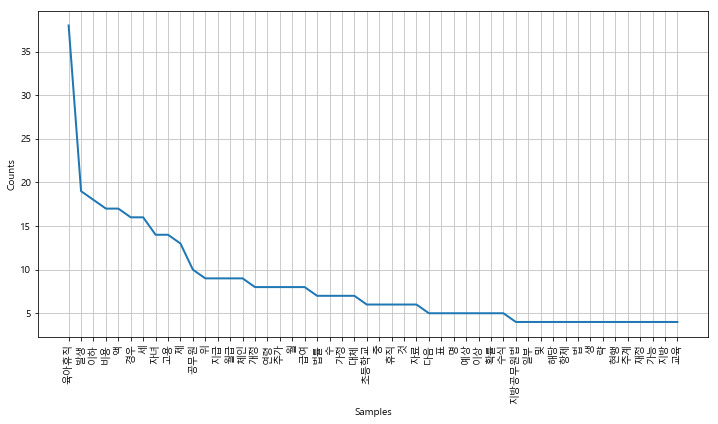

In [22]:
# 다시 그려보자
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [23]:
# cont 명령어를 이용해서 횟수 확인 가능
ko.count('초등학교')

6

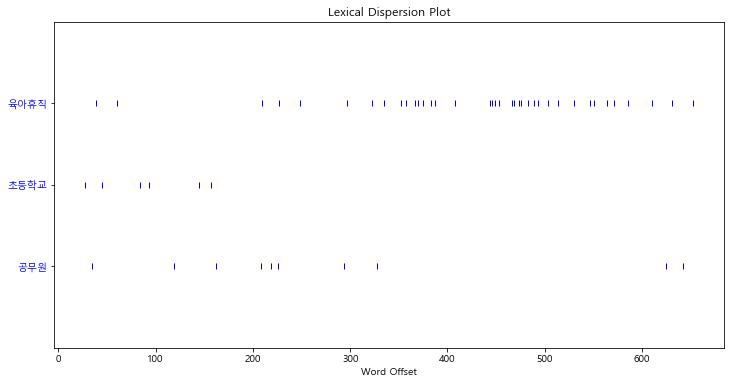

In [24]:
# 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다.
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [25]:
# 원하는 단어 주변부 단어까지 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
규 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴
요 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것
 일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀
 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현
명 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이
세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현


In [26]:
# 어떤 단어들이 연어로 사용되었는지 알 수 있다
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


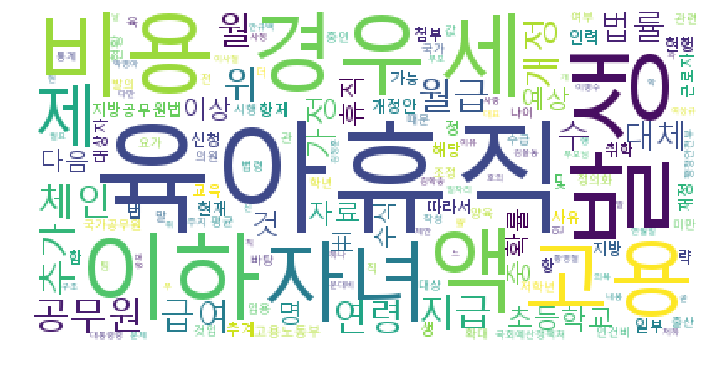

In [29]:
# 마직막으로 워드 클라우드를 적용해보자
data = ko.vocab().most_common(150)

from wordcloud import WordCloud, STOPWORDS
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()